In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

# Importing the data

In [ ]:
train_df = pd.read_csv(r'/content/train.csv')
test_df = pd.read_csv(r'/content/test.csv')

In [ ]:
train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data completeness and Quality

In [ ]:
# There are no null values as such - good
train_df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
# extracting area code, labeling yes no columns to 1 0 (to ensure consistency)
train_df['area_code'] = train_df['area_code'].apply(lambda x: int(x.split('_')[-1]))
train_df['international_plan'] = np.where((train_df['international_plan'] == 'yes'),1,0)
train_df['voice_mail_plan'] = np.where((train_df['voice_mail_plan'] == 'yes'),1,0)
train_df['churn'] = np.where((train_df['churn'] == 'yes'), 1, 0)

In [ ]:
# check for duplicate rows in the data - there are no duplicates
train_df[train_df.duplicated()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


# Data Distribution

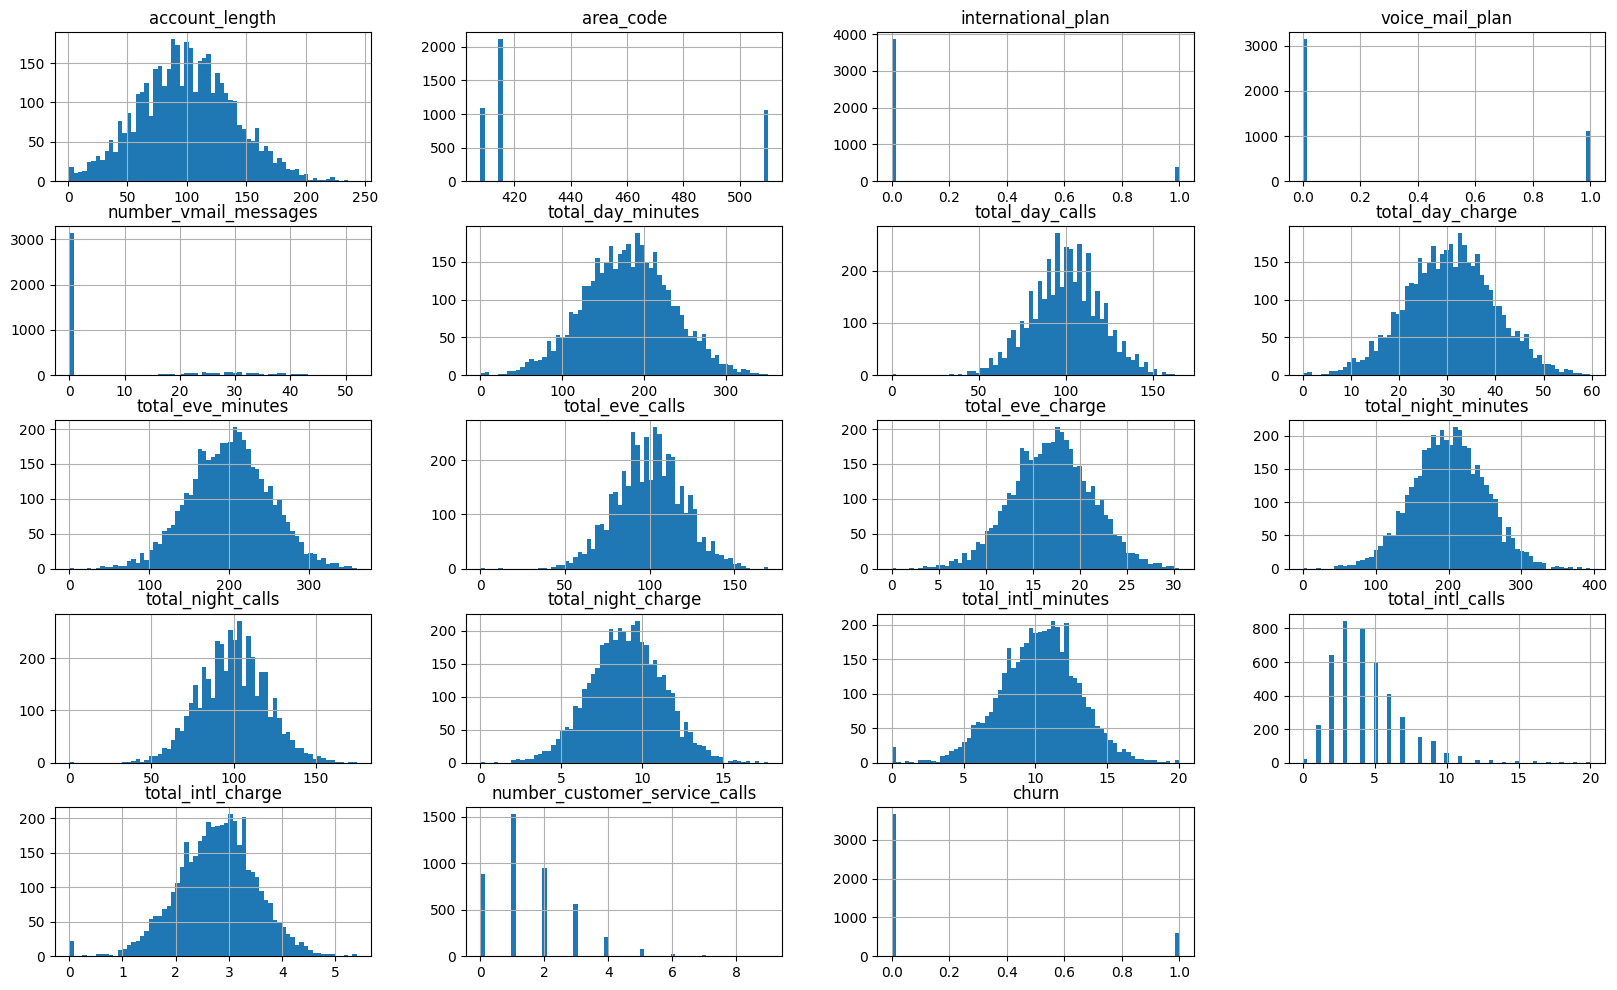

In [ ]:
distribution_plot_df = train_df.drop(columns=['state'])
distribution_plot_df.hist(figsize = (20, 12), bins = int(len(train_df)**0.5))
plt.show()

In [ ]:
# We can see that majority of the features follow a normal distribution

# Data correlation and analyses

In [13]:
# here we look at the mean of the features grouping with respect to the labels (churn / no churn)
# This gives a very good understanding on how the mean differs with respect to the labels
train_df.groupby(['churn']).mean()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,,,,
0,99.924973,436.543538,0.062705,0.282037,8.177437,175.555093,99.813801,29.844948,198.570674,100.231380,16.878743,199.577519,99.942771,8.981131,10.194441,4.460570,2.753018,1.441676
1,102.137124,438.479933,0.279264,0.137124,4.299331,208.990134,100.478261,35.528679,209.964883,99.841137,17.847207,206.331773,99.209030,9.285033,10.632441,4.217391,2.871254,2.275920


It is interesting to see that the churned customers have a mean account length in months to be 102.1, meaning some of the old customers have churned

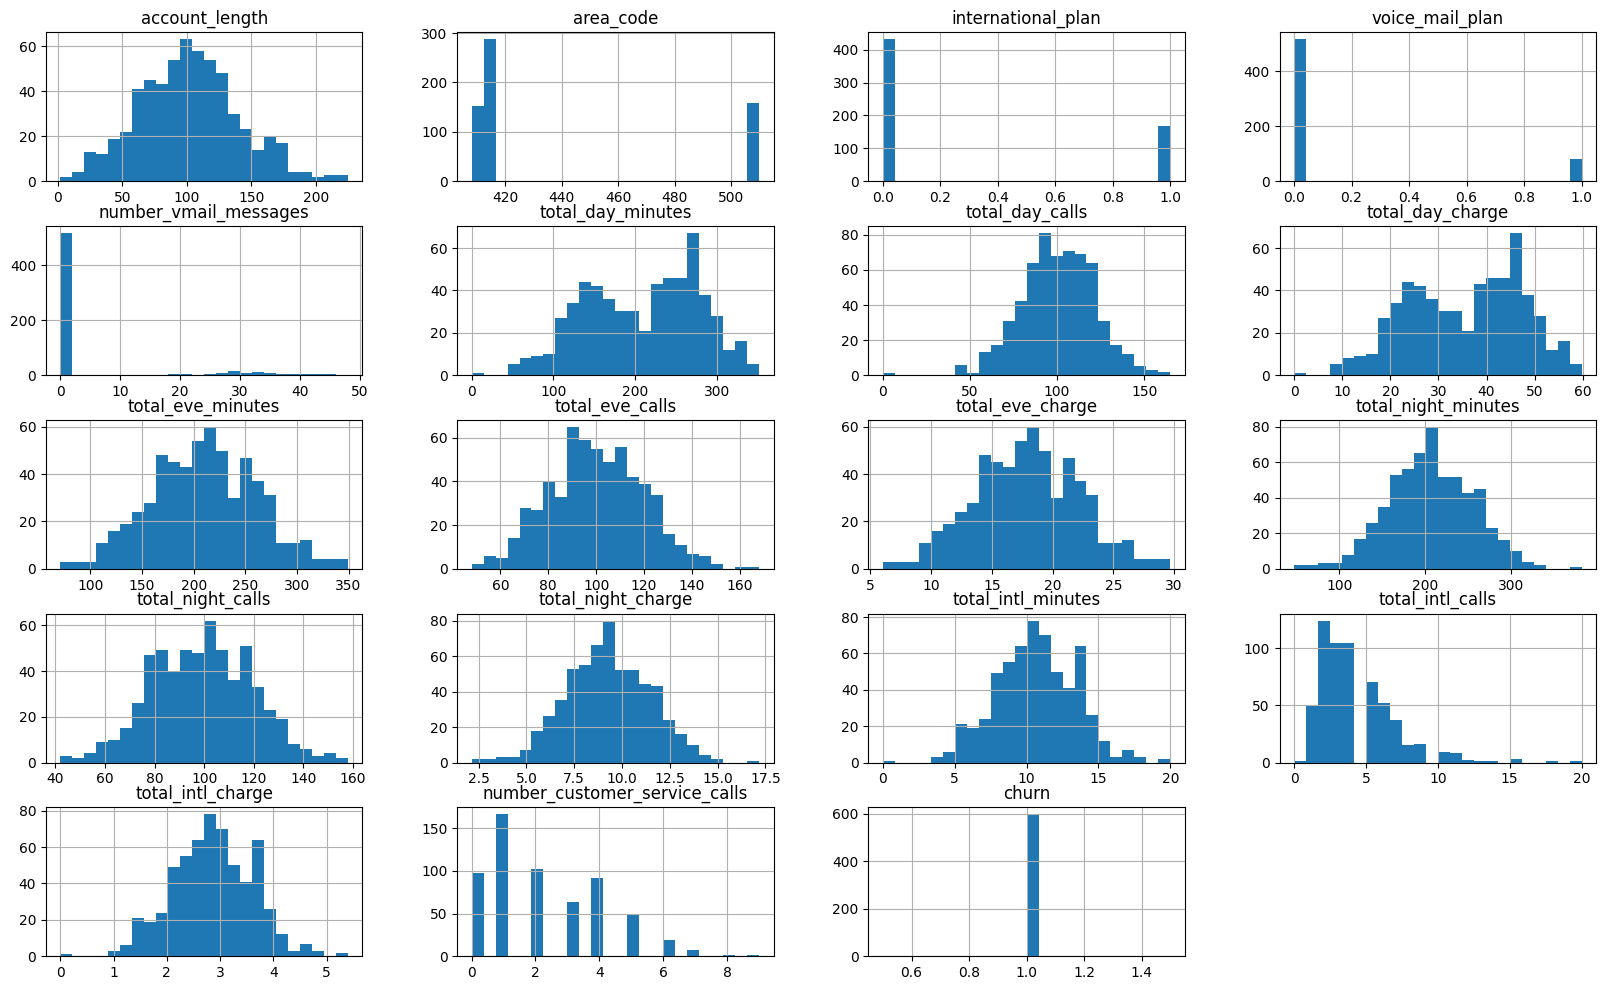

In [14]:
# Looking at the histogram of churned customers
churned_distribution_plot_df = train_df.drop(columns=['state'])
churned_distribution_plot_df = churned_distribution_plot_df[churned_distribution_plot_df['churn'] == 1]
churned_distribution_plot_df.hist(figsize = (20, 12), bins = int(len(churned_distribution_plot_df)**0.5))
plt.show()

We can also see from the histogram that the churned customers used to spend more time on day calls when compared to others. If for a real problem encountered in industry this can help us profile the customers. 

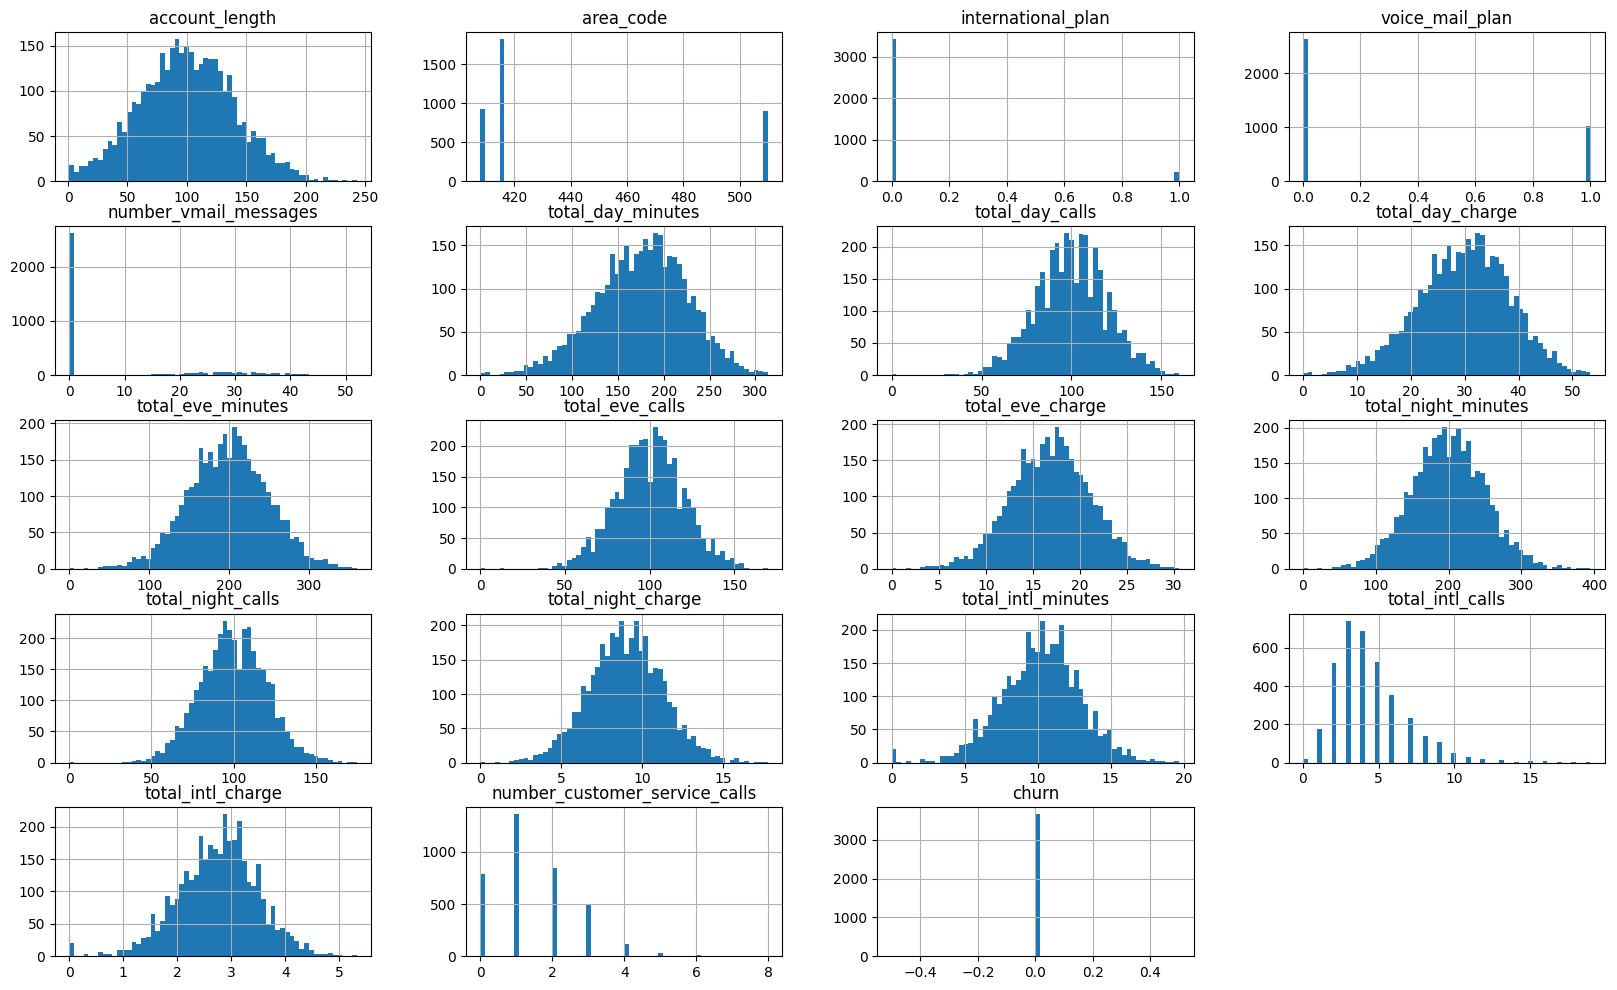

In [15]:
# Looking at the histogram of non-churned customers
churned_distribution_plot_df = train_df.drop(columns=['state'])
churned_distribution_plot_df = churned_distribution_plot_df[churned_distribution_plot_df['churn'] == 1]
churned_distribution_plot_df.hist(figsize = (20, 12), bins = int(len(churned_distribution_plot_df)**0.5))
plt.show()

In [16]:
def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y

In [22]:
churned_distribution_plot_df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,50,408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


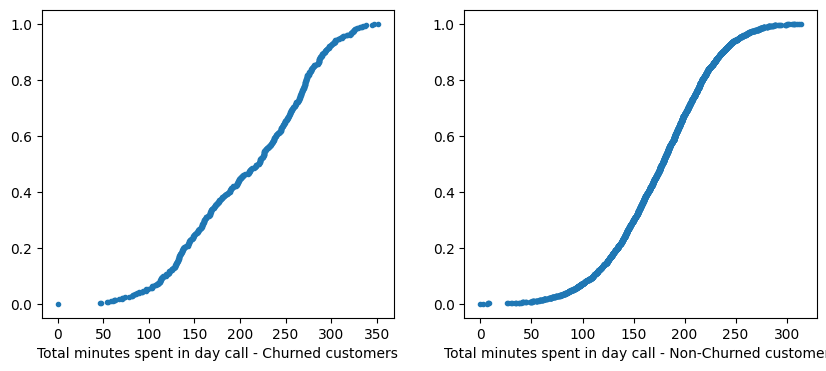

In [41]:
x_ht, y_ht = ecdf(train_df[train_df['churn']==1]['total_day_minutes'])
x_tt, y_tt = ecdf(train_df[train_df['churn']==0]['total_day_minutes'])
fig, axes = plt.subplots(1, 2, figsize = (10,4))
axes[0].scatter(x_ht, y_ht, marker = '.')
axes[0].set_xlabel('Total minutes spent in day call - Churned customers')
axes[1].scatter(x_tt, y_tt, marker= '.')
axes[1].set_xlabel('Total minutes spent in day call - Churned customers')
plt.show()

Histograms can be confusing because the distributions change depending on the number of bins. ECDF-empirical cumulative distribution can help to look in depth if in case of unclear distribution. It looks like more than 40% of churned customers have spent more than 240 minutes in day call

### Some summary points before moving on to further anlysis:
1.   Some old customers have decided to churn out
2.   Churned customers spent more time in day calls - This will hit the company financially.




### State level analysis

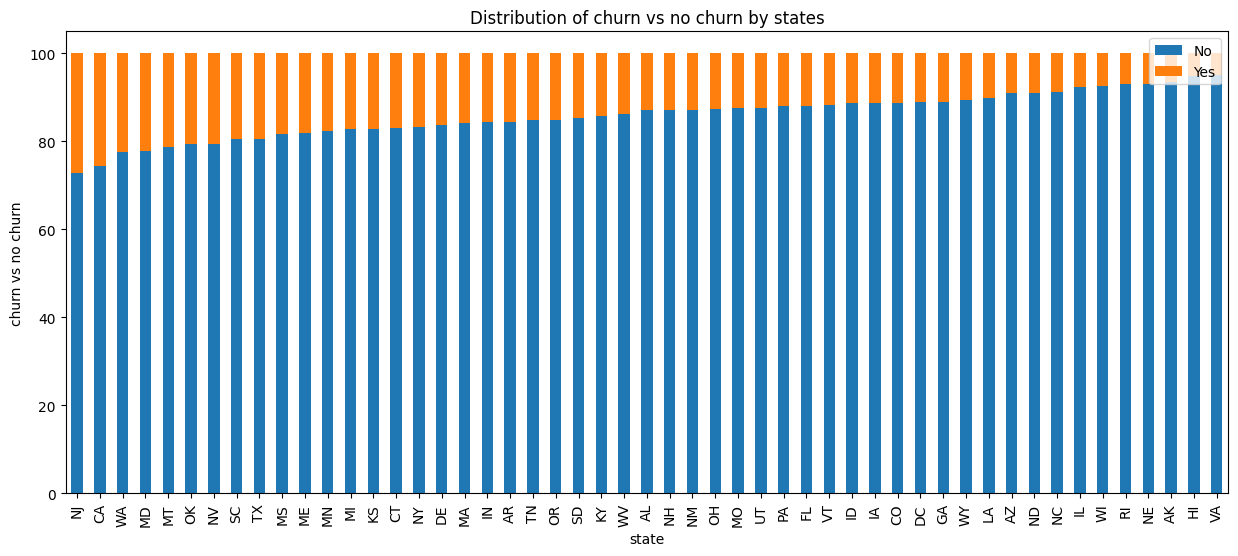

In [42]:
# Data distribution with respect to the dependent variable

percentages_churned_by_state = train_df.groupby(['state', 'churn']).size().unstack(fill_value = 0)
totals = percentages_churned_by_state.sum(axis = 1)

percentages_churned_by_state = percentages_churned_by_state.divide(totals, axis = 0)*100

percentages_churned_by_state.sort_values([1], ascending = False, inplace=True)

ax = percentages_churned_by_state.plot(kind = 'bar', stacked = True, figsize = (15, 6))
plt.xlabel('state')
plt.ylabel('churn vs no churn')
plt.title('Distribution of churn vs no churn by states')
plt.legend(['No', 'Yes'], loc = 'upper right');

In [43]:
churn_by_state = train_df.groupby(['state', 'churn']).size().unstack(fill_value = 0)
churn_by_state['total'] = churn_by_state.sum(axis = 1)
churn_by_state['churn_prportion'] = (churn_by_state[1] / churn_by_state['total'])*100
churn_by_state['tot_pop_proportion'] = churn_by_state['total'] / churn_by_state['total'].sum()
churn_by_state['churn_weighted_proportion'] = churn_by_state['tot_pop_proportion'] * churn_by_state['churn_prportion']
weighted_churn_by_state = churn_by_state.sort_values(by = ['churn_weighted_proportion'], ascending = False)
weighted_churn_by_state.head(10)

churn,0,1,total,churn_prportion,tot_pop_proportion,churn_weighted_proportion
state,,,,,,
NJ,70,26,96,27.083333,0.022588,0.611765
MD,67,19,86,22.093023,0.020235,0.447059
TX,79,19,98,19.387755,0.023059,0.447059
MN,89,19,108,17.592593,0.025412,0.447059
WV,120,19,139,13.669065,0.032706,0.447059
WA,62,18,80,22.500000,0.018824,0.423529
NV,66,17,83,20.481928,0.019529,0.400000
MT,63,17,80,21.250000,0.018824,0.400000
ME,73,16,89,17.977528,0.020941,0.376471


Weighted average helps in focusing on customers from states with higher users. Imagine a texas with only two users and both have churned. Simple mean would just show 100% have churned but a weighted average would weigh the churning proportion by the prooportion of population. This helps in focusing on the populous city with the highest churn

In [50]:
top_10_states_weighted = weighted_churn_by_state.head(10).index.tolist()
top_10_states = percentages_churned_by_state.head(10).index.tolist()

In [51]:
train_df[train_df['state'].apply(lambda x: x in top_10_states)].groupby(['churn']).mean()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,,,,
0,99.589085,438.136437,0.056180,0.261637,7.770465,174.066132,99.802568,29.591734,196.054575,99.234350,16.664848,197.838523,100.736758,8.902713,10.219583,4.378812,2.759823,1.467095
1,101.286550,438.116959,0.239766,0.140351,4.403509,211.901170,100.105263,36.023567,210.676608,99.795322,17.908070,208.109357,99.210526,9.364795,10.569591,4.362573,2.854386,2.175439


In [52]:
train_df[train_df['state'].apply(lambda x: x in top_10_states_weighted)].groupby(['churn']).mean()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,,,,
0,98.067909,438.158455,0.043941,0.250333,7.537949,176.602397,99.981358,30.022903,194.074834,99.515313,16.496431,200.129427,101.022636,9.005806,10.215313,4.424767,2.758722,1.509987
1,101.413978,443.763441,0.252688,0.139785,4.548387,212.827957,99.295699,36.181290,211.389247,100.241935,17.968763,203.715591,98.774194,9.167043,10.732796,4.349462,2.898280,2.236559


After weighing the churn percentages with population proportion there is some difference in which the averages turned out. Not very helpful here but could be significant in understanding what is happening when analysing problem

# Feature selection

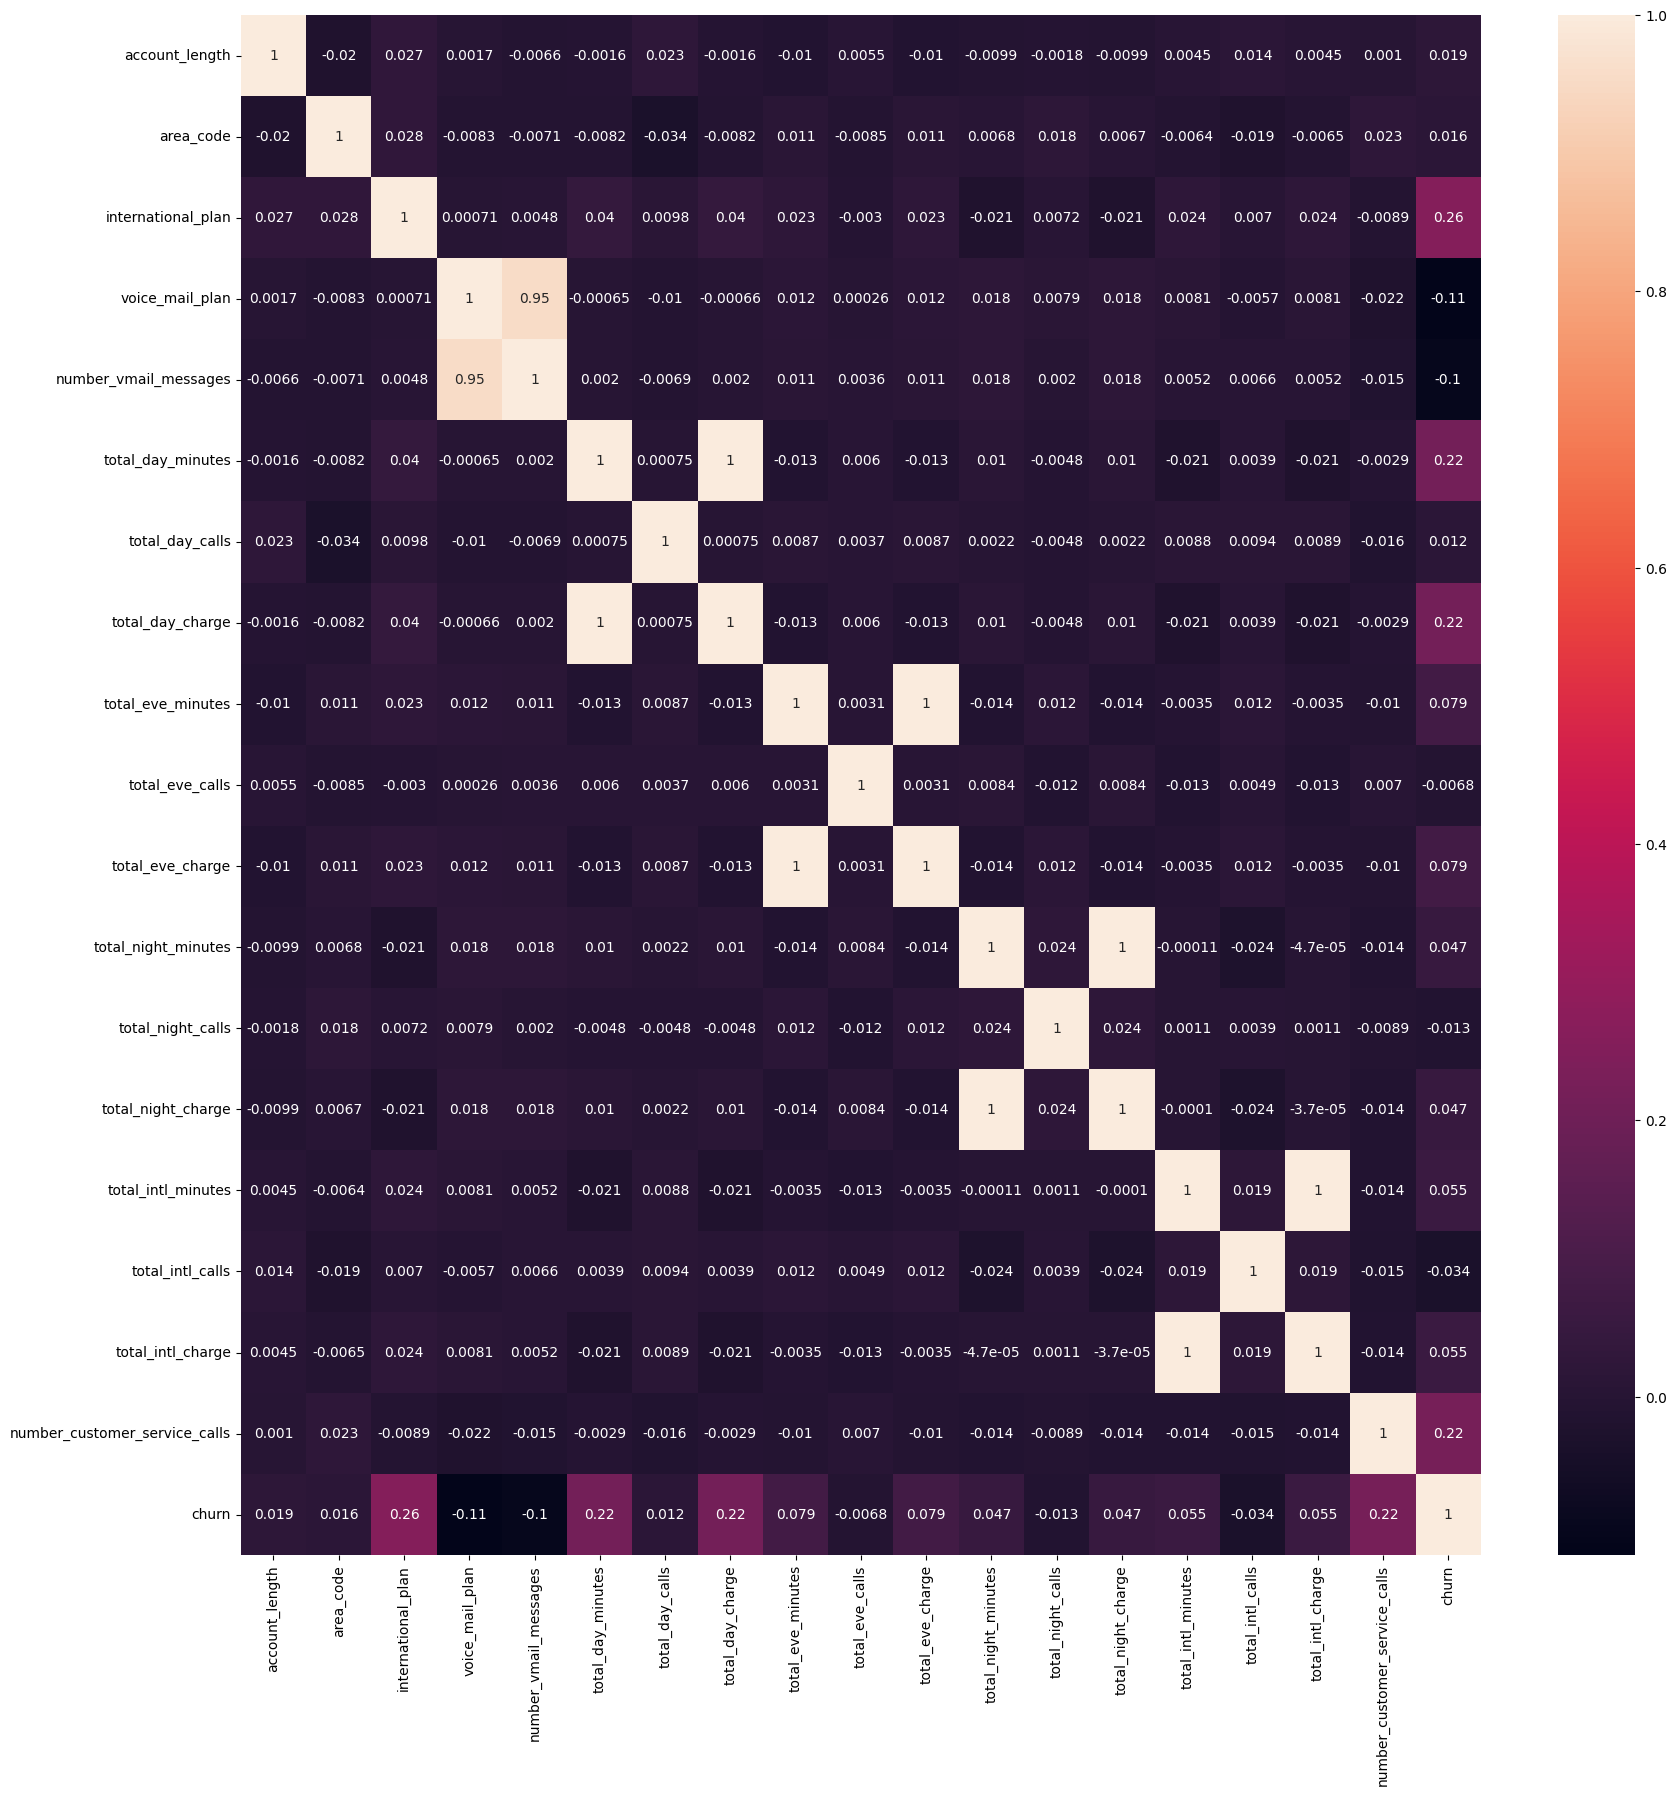

In [53]:
plt.figure(figsize = (20, 20))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

Looking at the churn row we can observe some prominent features that are somewhat correlated. But one has to be mindful of multicollinearity observed in the above heatmap. Although, tree based models handles multicollinearity better than linear models, it is a good practice to remove those columns. Although, the number of techniques for feature selection are numerous, it is problem specific

# Class imbalances

Classical problem when it comes to classification. In regression it will be a long tailed distribution of the target variable. Handing for these is a very important role. Depending on the criticality of the problem statement you can decide how to go upon this. Here we will generate syntheic samples to handle for class imbalances.

In [56]:
train_df2 = pd.get_dummies(train_df, columns = ['state'])
X = train_df2.drop(columns = ['churn'], axis = 1)
y = train_df2['churn']
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

In [57]:
train_df.churn.value_counts(1)

0    0.859294
1    0.140706
Name: churn, dtype: float64

In [62]:
np.unique(y_smote, return_counts = True)

(array([0, 1]), array([3652, 3652]))

# Model Building

Here comes the easy part. Since you are starting out make sure you spend good time with data and if in doubt with some kind of pre-processing you did make sure you track all the things you did because it will help immensely when interpreting the results of the model. It also makes iterating next steps to building robust model easier.

In [65]:
# first building with the raw data

X = train_df2.drop(columns = ['churn'])
y = train_df2['churn']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 42, test_size = 0.2, stratify = y)

In [77]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train, y_train)
preds = r_clf.predict(X_test)
print(f"precision: {precision_score(preds, y_test)},\nrecall: {recall_score(preds, y_test)},\nf1_score: {f1_score(preds, y_test)}\n")
print(classification_report(preds, y_test))

precision: 0.6333333333333333,
recall: 1.0,
f1_score: 0.7755102040816326

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       774
           1       0.63      1.00      0.78        76

    accuracy                           0.95       850
   macro avg       0.82      0.97      0.87       850
weighted avg       0.97      0.95      0.95       850



In [71]:
# building the model with SMOTE data
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, shuffle = True, random_state = 42, test_size = 0.2)


In [78]:
r_clf = RandomForestClassifier()
r_clf.fit(X_train_smote, y_train_smote)
smote_preds = r_clf.predict(X_test_smote)
print(f"precision: {precision_score(smote_preds, y_test_smote)}\nrecall: {recall_score(smote_preds, y_test_smote)}\nf1_score: {f1_score(smote_preds, y_test_smote)}\n")
print(classification_report(smote_preds, y_test_smote))

precision: 0.9331436699857752,
recall: 0.9689807976366323,
f1_score: 0.9507246376811593

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       784
           1       0.93      0.97      0.95       677

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95      0.95      0.95      1461



Looks like analysis on smote gives a better result when compared to the raw data. If the accuracy was the only metric then we could be mislead because of the imbalance but we see other metrics are not that great. Whereas we minimised the problem with SMOTE data. The accuracy is the same but improved f1, precision and recall.<br>
Now the question is which metric to look at when at:<br>
This too depends on the business problem. If the goal was to ensure that we do not miss on someone who would churn which can lead to losing out on customers then recall will be a good measure(reduce the false negative). On the other hand if the goal of the business was not to wrongly classify someone who would not churn to churn and give flamboyant discounts then precision is the metric to look at (reducing the number of false positives).

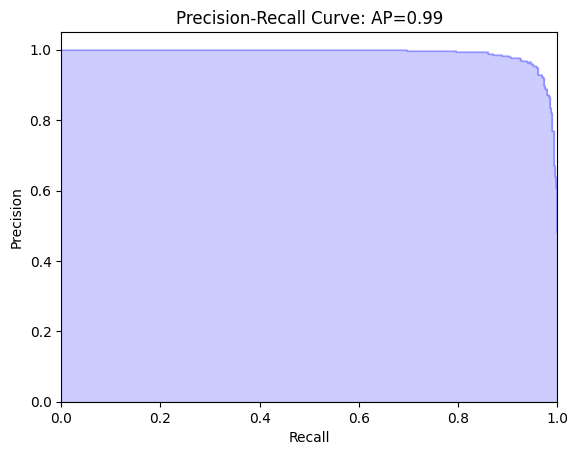

In [81]:
y_score = r_clf.predict_proba(X_test_smote)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_smote, y_score)
avg_precision = average_precision_score(y_test_smote, y_score)

plt.step(recall, precision, color='blue', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(avg_precision))
plt.show()

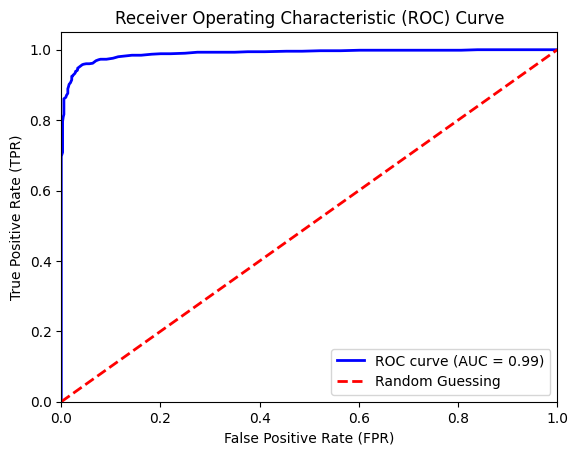

In [83]:
y_score = r_clf.predict_proba(X_test_smote)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_smote, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()